# Predicting Success of a Startup
## Grey Campus Data Science Bootcamp

You are hired by a venture capitalist to predict the profit of a startup. Fo that you have to deal with a dataset which contains the details of 50 startup’s and predicts the profit of a new Startup based on certain features. Based on your decision and prediction, whether one should invest in a particular startup or not.

Dataset contains the following fields: 
R&D Stend - Total amount of money spent on Research and Development Administration - Total amount of money spent on Administration 
Marketing Spend - Total amount of money spent on Markeing 
State - The state where the startup operates 
Profit - Profit earned by startup

You have to perform following task before applying machine learning algorithms: 
1. Handle missing values 
2. Prepare data for training and testing
3. Apply Decision Tree algorithm to train the model
4. Apply Random Forest Regressor algorithm to train the model
5. Compare the accuracy with Linear Regression too.

In [78]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [79]:
#loading data file
data = pd.read_csv('50_Startups.csv')

In [80]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [81]:
#displays number of columns and records/rows in dataset
#check if there is any missing data or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [82]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [96]:
features = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values

features

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [98]:
#convert the categorical features to numerical features as 
#sklearn works only with numpy array
#Instead of label enconding and then onehotencoding, 
#newer version directly works with onehotencoding using ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
features = transformer.fit_transform(features.tolist())
features

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [99]:
#converting an object to normal array
features = features.astype(float)

features

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

#### Decision Tree

In [88]:
#sampling the dataset
#normally 20% dataset is used for testing and 80% is used for training --> test_size=0.2 means 20%  
#Training set will be used to train the model
#Create Training and Testing sets
# Testing set will be used to test our model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=1)

In [89]:
#model 1
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [90]:
#checking score of training as well as testing
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

0.9719776806321837
0.8784483297473074


Model is not generalized yet. You may check for other values of max_depth.
max_depth generally is odd values. You may check for 5,7,9... And check for training and testing score and choose the model with generalized score.

In [91]:
#model 2
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=7)
DTR.fit(X_train,y_train)

#checking score of training as well as testing
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

1.0
0.9055473298428482


In [92]:
#model 3
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=9)
DTR.fit(X_train,y_train)

#checking score of training as well as testing
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

1.0
0.893367269067938


In [100]:
#model 4
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=11)
DTR.fit(X_train,y_train)

#checking score of training as well as testing
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

1.0
0.9068258257056178


#### Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=3)
RF.fit(X_train,y_train.ravel())
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.9397054692759074
0.8583221383555718


In [95]:
from sklearn.ensemble import RandomForestRegressor
for i in range(4,10):
    RF=RandomForestRegressor(n_estimators=3)
    RF.fit(X_train,y_train.ravel())
    print("n_estimator = ",i)
    print("Training Score =",RF.score(X_train,y_train))
    print("Testing Score = ",RF.score(X_test,y_test))

n_estimator =  4
Training Score = 0.9376687425892323
Testing Score =  0.9651216307929065
n_estimator =  5
Training Score = 0.95997985636133
Testing Score =  0.937442140616995
n_estimator =  6
Training Score = 0.9570507485236214
Testing Score =  0.9491904416645599
n_estimator =  7
Training Score = 0.9707049721209453
Testing Score =  0.9269335324225008
n_estimator =  8
Training Score = 0.9518066484009378
Testing Score =  0.9438203318155234
n_estimator =  9
Training Score = 0.9480349319124239
Testing Score =  0.8530235713653223


__You can conclude that with n_estimator 8, generalized model can be derived where testing score is more than training score.__

#### Linear Regression

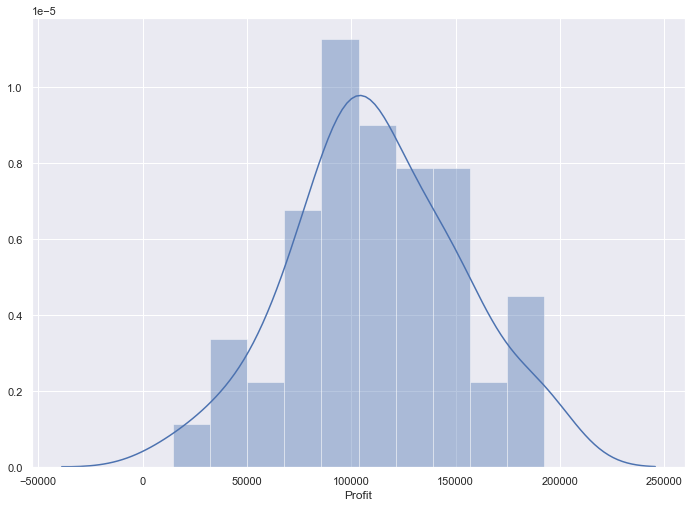

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Profit'], bins = 10)

plt.show()

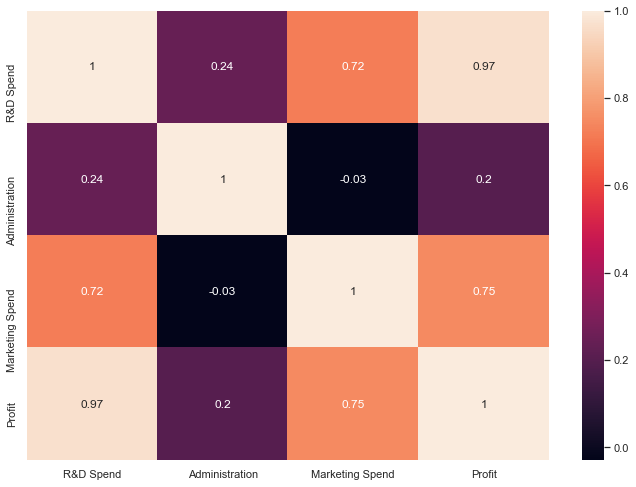

In [65]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

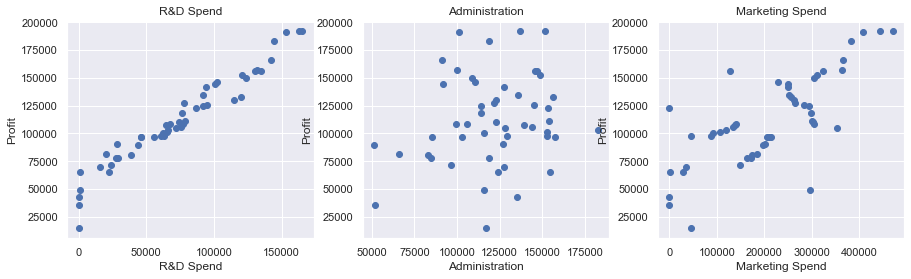

In [102]:
plt.figure(figsize=(15, 4))

features = ['R&D Spend','Administration','Marketing Spend']
target = data['Profit']  

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target  
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Profit')

__R&D looks linear and Marketing Spend looks almost linear__

In [103]:
#Model 1
X = pd.DataFrame(np.c_[data['R&D Spend']], columns = ['R&D Spend'])
Y = data['Profit']

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40, 1)
(10, 1)
(40,)
(10,)


In [105]:
LTR = LinearRegression()
LTR.fit(X_train, Y_train)

LinearRegression()

In [106]:
y_train_predict = LTR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = LTR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 9346.245497712614


The model performance for testing set
RMSE is 8738.136666746004


In [107]:
LTR.score(X_test, Y_test) 
score = LTR.score(X_test, Y_test)
score

0.956549813180969

In [111]:
#Model 2

X = pd.DataFrame(np.c_[data['R&D Spend'], data['Marketing Spend']], columns = ['R&D Spend','Marketing Spend'])
Y = data['Profit']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40, 2)
(10, 2)
(40,)
(10,)


In [112]:
LTR = LinearRegression()
LTR.fit(X_train, Y_train)

y_train_predict = LTR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

y_test_predict = LTR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 9286.196467862448


The model performance for testing set
RMSE is 7062.932358612762


In [113]:
LTR.score(X_test, Y_test) 
score = LTR.score(X_test, Y_test)
score

0.9674854200887459

__Model 2 has lower RMSE that is 7062 and has 96% accuracy__

## Thank You!